In [963]:
#this cell once everything is run will hold all of the final datasets
display(prem_table.head(2)) #this is the premier league table for the last 3 years with points, goal difference, and goals for
display(most_competitive_teams.head(2)) ##which teams were the hardest to beat home and away
display(hardest_stadiums_win.head(2))##Hardest to beat at home

,Season_End_Year,Team,rank,points,Goal Difference,Goals
0,2021,Manchester City,1,86,51,83
1,2021,Manchester Utd,2,74,29,73


,Season_End_Year,Team,Games,rank
52,2023,Manchester City,33,1
54,2023,Newcastle Utd,33,2


,Season_End_Year,Stadium,Capacity,Games Lost,Odds of Winning
40,2023,Anfield,61000,1,0.0526
45,2023,Etihad Stadium,53400,1,0.0526


In [1984]:
#import libraries and packages
!pip install kagglehub pandas
import kagglehub
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import requests
from PIL import Image
from io import BytesIO
from matplotlib.ticker import PercentFormatter
import numpy as np

In [1926]:
#take the path from the kaggle website
path = kagglehub.dataset_download("evangower/premier-league-matches-19922022")
os.listdir(path)
df = pd.read_csv(os.path.join(path, 'premier-league-matches.csv'))
df.head(3)

#make the sure the dataset is only looking at the last 3 years of premier league
df = df[df['Season_End_Year'] >= 2021]

df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
10886,2021,1,2020-09-12,Fulham,0,3,Arsenal,A
10887,2021,1,2020-09-12,Crystal Palace,1,0,Southampton,H
10888,2021,1,2020-09-12,Liverpool,4,3,Leeds United,H
10889,2021,1,2020-09-12,West Ham,0,2,Newcastle Utd,A
10890,2021,1,2020-09-13,West Brom,0,3,Leicester City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


# Dataset Updates

### add in the stadium name for the teams

In [1930]:
team_to_stadium = {
    'Arsenal': 'Emirates Stadium',
    'Aston Villa': 'Villa Park',
    'Bournemouth': 'Vitality Stadium',
    'Brentford': 'GTech Community Stadium',
    'Brighton': 'Amex Stadium',
    'Burnley': 'Turf Moor',
    'Chelsea': 'Stamford Bridge',
    'Crystal Palace': 'Selhurst Park',
    'Everton': 'Goodison Park',
    'Fulham': 'Craven Cottage',
    'Leeds United': 'Elland Road',
    'Leicester City': 'King Power Stadium',
    'Liverpool': 'Anfield',
    'Manchester City': 'Etihad Stadium',
    'Manchester Utd': 'Old Trafford',
    'Newcastle Utd': "St James' Park",
    'Norwich City': 'Carrow Road',
    "Nott'ham Forest": 'City Ground',
    'Sheffield Utd': 'Bramall Lane',
    'Southampton': "St Mary's Stadium",
    'Tottenham': 'Tottenham Hotspur Stadium',
    'Watford': 'Vicarage Road',
    'West Brom': 'The Hawthorns',
    'West Ham': 'London Stadium',
    'Wolves': 'Molineux Stadium'
}



def get_stadium(row):
    return team_to_stadium[row['Home']]

df['Stadium'] = df.apply(get_stadium, axis=1)


### add in the name of the stadium and the capacity for the home team

In [1934]:
##build the capacity dictionaries
capacity_2021 = {
    'Arsenal': 60704,  # Emirates Stadium
    'Aston Villa': 42682,  # Villa Park
    'Bournemouth': 11307,  # Vitality Stadium
    'Brentford': 17250,  # Brentford Community Stadium
    'Brighton': 31876,  # Amex Stadium
    'Burnley': 21944,  # Turf Moor
    'Chelsea': 40834,  # Stamford Bridge
    'Crystal Palace': 25486,  # Selhurst Park
    'Everton': 39414,  # Goodison Park
    'Fulham': 25700,  # Craven Cottage
    'Leeds United': 37890,  # Elland Road
    'Leicester City': 32312,  # King Power Stadium
    'Liverpool': 54074,  # Anfield
    'Manchester City': 55097,  # Etihad Stadium
    'Manchester Utd': 74994,  # Old Trafford
    'Newcastle Utd': 52338,  # St James' Park
    'Norwich City': 27244,  # Carrow Road
    "Nott'ham Forest": 30445,  # City Ground
    'Sheffield Utd': 32702,  # Bramall Lane
    'Southampton': 32384,  # St Mary's Stadium
    'Tottenham': 62062,  # Tottenham Hotspur Stadium
    'Watford': 22200,  # Vicarage Road
    'West Brom': 26688,  # The Hawthorns
    'West Ham': 60000,  # London Stadium
    'Wolves': 31750  # Molineux Stadium
}
capacity_2022 = {
    'Arsenal': 60704,
    'Aston Villa': 42657,
    'Bournemouth': 11307,
    'Brentford': 17250,
    'Brighton': 31800,
    'Burnley': 21944,
    'Chelsea': 40343,
    'Crystal Palace': 25486,
    'Everton': 39414,
    'Fulham': 25700,
    'Leeds United': 37892,
    'Leicester City': 32312,
    'Liverpool': 54074,
    'Manchester City': 53400,
    'Manchester Utd': 74310,
    'Newcastle Utd': 52305,
    'Norwich City': 27244,
    "Nott'ham Forest": 30445,
    'Sheffield Utd': 32702,
    'Southampton': 32384,
    'Tottenham': 62850,
    'Watford': 22200,
    'West Brom': 26688,
    'West Ham': 62500,
    'Wolves': 32050
}
capacity_2023 = {
    'Arsenal': 60704,
    'Aston Villa': 42657,
    'Bournemouth': 11307,
    'Brentford': 17250,
    'Brighton': 31800,
    'Burnley': 21944,
    'Chelsea': 40343,
    'Crystal Palace': 25486,
    'Everton': 39414,
    'Fulham': 27000,  # Riverside Stand phased expansion underway
    'Leeds United': 37892,
    'Leicester City': 32312,
    'Liverpool': 61000,  # Anfield Road Stand expansion completed late 2023
    'Manchester City': 53400,
    'Manchester Utd': 74310,
    'Newcastle Utd': 52305,
    'Norwich City': 27244,
    "Nott'ham Forest": 30445,  # Small capacity increase with pod seating
    'Sheffield Utd': 32702,
    'Southampton': 32384,
    'Tottenham': 62850,
    'Watford': 22200,
    'West Brom': 26688,
    'West Ham': 62500,
    'Wolves': 32050
}




seasons = {
    2021 : capacity_2021,
    2022 : capacity_2022,
    2023 : capacity_2023
}

row = df.iloc[0]
def get_capacity(row):
    capacity_dict = seasons[row['Season_End_Year']]
    
    return capacity_dict[row['Home']]

df['Capacity'] = df.apply(get_capacity, axis=1)

In [1936]:
display(df.head(5))

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Stadium,Capacity
10886,2021,1,2020-09-12,Fulham,0,3,Arsenal,A,Craven Cottage,25700
10887,2021,1,2020-09-12,Crystal Palace,1,0,Southampton,H,Selhurst Park,25486
10888,2021,1,2020-09-12,Liverpool,4,3,Leeds United,H,Anfield,54074
10889,2021,1,2020-09-12,West Ham,0,2,Newcastle Utd,A,London Stadium,60000
10890,2021,1,2020-09-13,West Brom,0,3,Leicester City,A,The Hawthorns,26688


## Add Columns to the DF

In [1939]:
#using the where functioon, which operates as in if statement add in the winning team column
df['Winning_Team'] = np.where(df['FTR'] == 'A', df['Away'], np.where(df['FTR'] == 'H', df['Home'], 'D'))
df['points'] = np.where(df['Winning_Team'] != 'D', 3, 1)

df['Goal Difference'] = abs(df['HomeGoals'] - df['AwayGoals'])

# Building the Premier League Table

In [1942]:
##split the df into winning teams vs draws. Use this to properly give points to the teams
tie_df = df[df['Winning_Team'] == 'D']

#Home teams points then away teams points
#columns_to_group = ['Season_End_Year', 'Home']


home_results = tie_df.groupby(['Season_End_Year', 'Home'], as_index=False)['points'].sum().rename(columns={'Home':'Team'})
away_results = tie_df.groupby(['Season_End_Year', 'Away'], as_index=False)['points'].sum().rename(columns={'Away':'Team'})

draw_points = pd.concat([home_results,away_results]).groupby(['Season_End_Year', 'Team'], as_index=False)['points'].sum()

In [1945]:
#create a df that holds all points for winning teams then join to draw_points to recreate the prem table over the last 3 years
#remove all instances of D

#create the path
win_results = df[df['FTR'] != 'D'].copy()

win_results.groupby(['Season_End_Year', 'Winning_Team'], as_index=False)['points'].sum()
win_points = win_points.rename(columns={'Winning_Team' : 'Team'})


#display(win_points.head())
#display(draw_points.head())

#merge and group by then sort to get the final premiere league table
points_df = pd.concat([win_points,draw_points])
points_tally_df = points_df.groupby(['Season_End_Year', 'Team'], as_index=False)['points'].sum()

final_table = points_tally_df.sort_values(['Season_End_Year', 'points'], ascending=[True,False]).reset_index(drop=True)

#final_table

In [1947]:
##calculate the goals scored
home_goals = df[['Season_End_Year','Home', 'HomeGoals']].copy()
home_goals = home_goals.groupby(['Season_End_Year', 'Home'], as_index=False)['HomeGoals'].sum().rename(columns={'Home' : 'Team', 'HomeGoals': 'Goals'})

away_goals = df[['Season_End_Year','Away', 'AwayGoals']].copy()
away_goals = away_goals.groupby(['Season_End_Year', 'Away'], as_index=False)['AwayGoals'].sum().rename(columns={'Away' : 'Team', 'AwayGoals': 'Goals'})

goals_scored = pd.concat([home_goals, away_goals]).groupby(['Season_End_Year', 'Team'], as_index=False)['Goals'].sum()

#merge the datasets with the goals
points_goals_df = pd.merge(final_table, goals_scored, on=['Season_End_Year','Team'])

In [1949]:
#groupy by the home then away team and sum the different goals
home = df.groupby(['Season_End_Year', 'Home'], as_index=False)[['HomeGoals', 'AwayGoals']].sum().rename(columns={'Home': 'Team'})
away = df.groupby(['Season_End_Year', 'Away'], as_index=False)[['HomeGoals', 'AwayGoals']].sum().rename(columns={'Away': 'Team'})

#calculate the goal difference home and away
home['Goal Difference'] = home['HomeGoals'] - home['AwayGoals']
away['Goal Difference'] = away['AwayGoals'] - away['HomeGoals']

goal_difference = pd.concat([home, away]).groupby(['Season_End_Year', 'Team'], as_index=False)['Goal Difference'].sum()

#join the final prem teams
final_prem_table = pd.merge(points_goals_df, goal_difference, on=['Season_End_Year', 'Team'])

In [1951]:
prem_table = final_prem_table.sort_values(['Season_End_Year','points', 'Goal Difference', 'Goals'], ascending=[True, False, False, False])

prem_table['rank'] = prem_table.groupby('Season_End_Year').cumcount() + 1

#create the final premiere league table
prem_table = prem_table[['Season_End_Year', 'Team', 'rank', 'points', 'Goal Difference', 'Goals']]

prem_table

,Season_End_Year,Team,rank,points,Goal Difference,Goals
0,2021,Manchester City,1,86,51,83
1,2021,Manchester Utd,2,74,29,73
2,2021,Liverpool,3,69,26,68
3,2021,Chelsea,4,67,22,58
4,2021,Leicester City,5,66,18,68
5,2021,West Ham,6,65,15,62
6,2021,Tottenham,7,62,23,68
7,2021,Arsenal,8,61,16,55
9,2021,Leeds United,9,59,8,62
8,2021,Everton,10,59,-1,47


# End of Premier League Table Build

# The Teams that are hardest to beat Home and Away

In [1955]:
#take the tie dataframe that we had before and then also create a dataframe that holds not ties
tie_df
not_tie_df = df[df['FTR'] != 'D']

#for all games that are not ties count the number of wins for the winning team
win_count = not_tie_df.groupby(['Season_End_Year', 'Winning_Team'], as_index=False)['FTR'] \
.count().rename(columns={'Winning_Team' : 'Team','FTR' : 'Games'})

#count the number of ties there are for the 
tie_home = tie_df.groupby(['Season_End_Year', 'Home'], as_index=False)['FTR'].count().rename(columns={'Home' : 'Team'})
tie_away = tie_df.groupby(['Season_End_Year', 'Away'],as_index=False)['FTR'].count().rename(columns={'Away' : 'Team'})

#merge the two dataframes together and then sum FTR_x and FTR_y to create the total ties column
tie_games = pd.merge(tie_home, tie_away, on=['Season_End_Year','Team'])
tie_games['Games'] = tie_games['FTR_x'] + tie_games['FTR_y']

tie_games = tie_games.drop(['FTR_x', 'FTR_y'], axis=1)

#merge the wins with the tie games
all_games = pd.concat([tie_games, win_count]).groupby(['Season_End_Year', 'Team'], as_index=False)['Games'].sum()

#organize the teams and then rank them by most competitive
comp_teams = all_games.sort_values(by=['Season_End_Year', 'Games'], ascending=[False, False])
comp_teams['rank'] = comp_teams.groupby('Season_End_Year').cumcount() + 1

comp_teams.head(1)

,Season_End_Year,Team,Games,rank
52,2023,Manchester City,33,1


# End of the most competitive teams build

# Hardest Stadiums To Visit

In [1959]:
away_winners = df[df['Away'] == df['Winning_Team']]
away_winners = away_winners.groupby(['Season_End_Year', 'Stadium', 'Capacity', 'Home'], as_index=False)['points'].count()\
.rename(columns={'points' : 'Games Lost', 'Home' : 'Team'})

#join in the premier league dataset and used rank to finish the sort for ties
rank_table = prem_table[['Season_End_Year', 'Team', 'rank']]
away_winners = pd.merge(away_winners, rank_table, on=['Season_End_Year', 'Team'])

#sort the dataframe by the 
hardest_stadiums_win = away_winners.sort_values(by=['Season_End_Year', 'Games Lost', 'rank'], ascending=[False, True, True])
hardest_stadiums_win['Odds of Winning'] = round(hardest_stadiums_win['Games Lost'] / 19,4)

display(hardest_stadiums_win.head(2))

,Season_End_Year,Stadium,Capacity,Team,Games Lost,rank,Odds of Winning
45,2023,Etihad Stadium,53400,Manchester City,1,1,0.0526
51,2023,Old Trafford,74310,Manchester Utd,1,3,0.0526


# Create the final visuals for the Dashboard

In [1962]:
#prem table style
def highlight_top(row, win_color = 'lightgreen', euro_color = 'lightblue', relegation_color ='red'):
    if row['rank'] == 1:
        return [f'background-color: {win_color}'] * len(row)
    elif 2 <= row['rank'] <= 4:
        return [f'background-color: {euro_color}'] * len(row)
    elif 18 <= row['rank'] <= 20:
        return [f'background-color: {relegation_color}'] * len(row)
    else:
        return [''] * len(row)


#build a chart that is going to create a chart that will be used to show ranks and gradients
def gradient_horizontal_bar(df, x, y, title, gradient_col, xlab = 'x', ylab = 'y', colors_scheme='RdYlGn_r'):
    df = most_competitive_teams_ready.copy()
    
    #creates the highest and lowest values of the gradient
    norm = plt.Normalize(df[gradient_col].min(), df[gradient_col].max())
    
    #create a color map, cmap actually creates the color scheme using matplotlib colormaps
    #colors_scheme = 'RdYlGn_r'
    cmap = mpl.colormaps[colors_scheme]
    
    #using the normalized range from the gradient column and apply it to the dataset
    colors = cmap(norm(df[gradient_col]))

    
    
    #create the actual image
    plt.figure(figsize=(12,8))
    bars = plt.barh(df[x], df[y], color = colors)
    plt.gca().invert_yaxis()
    
    plt.xlabel(xlab)
    plt.title(title)
    plt.ylabel(ylab)
    return bars

<BarContainer object of 20 artists>

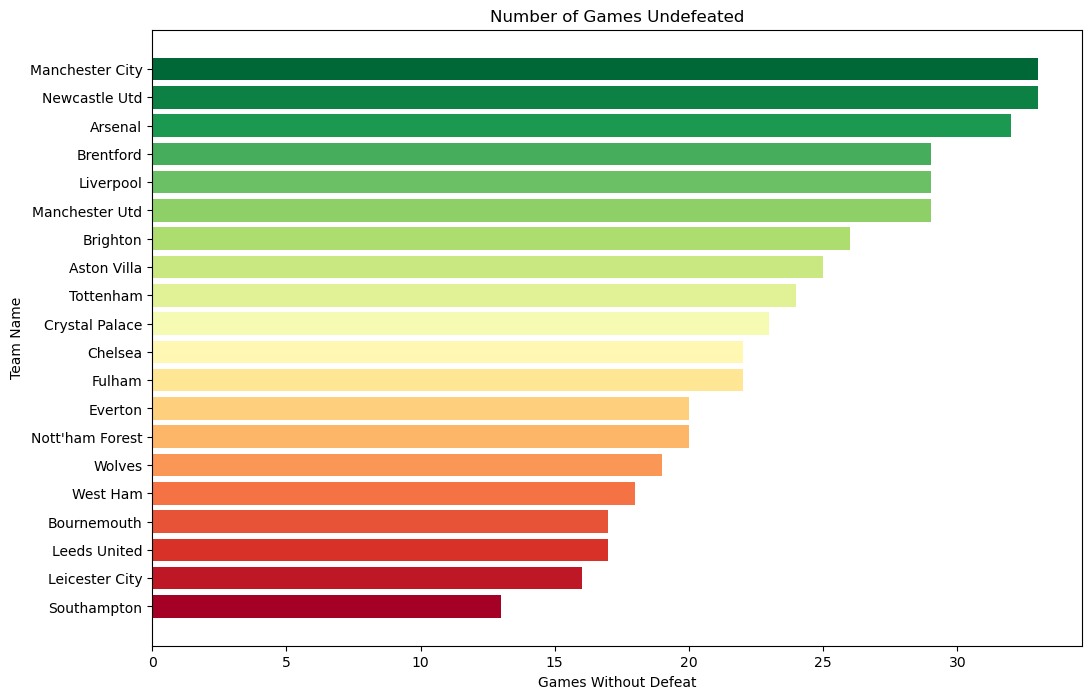

In [1964]:
gradient_horizontal_bar(most_competitive_teams_ready, 'Team', 'Games', 'Number of Games Undefeated', 'rank',
                        xlab = 'Games Without Defeat', ylab = 'Team Name')

In [1968]:
#create a drop down menu for the year for most competitive teams
year = int(input("Please enter a year between 2021-2023: "))

Please enter a year between 2021-2023:  2023


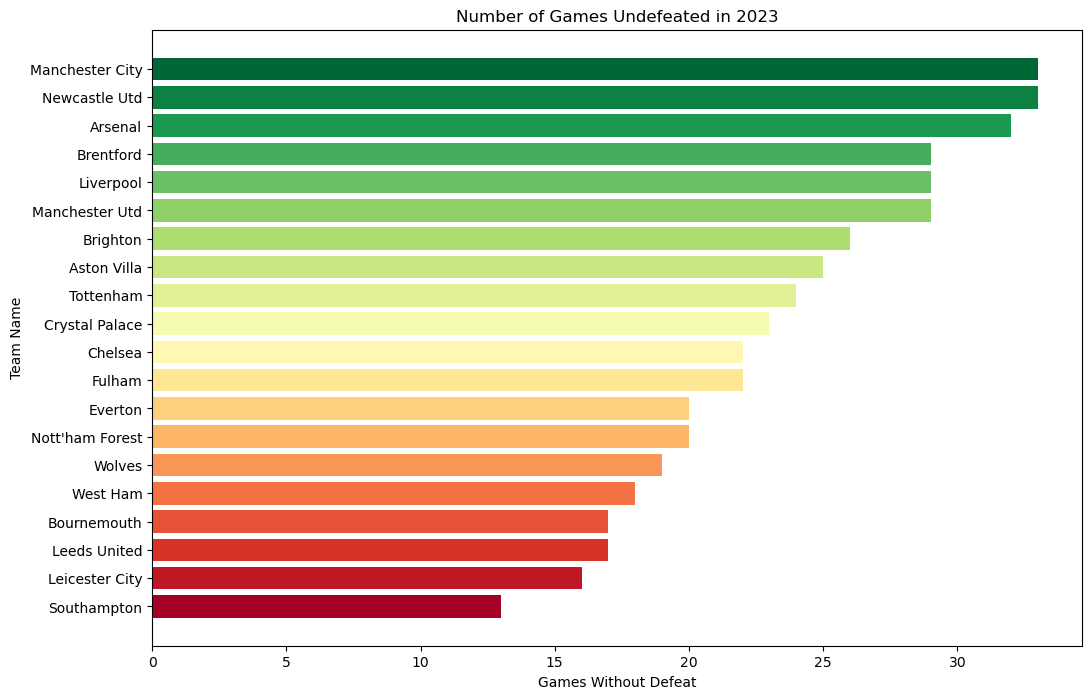

In [1970]:
#set up the premier league table for 2023
prem_year_table = prem_table[prem_table['Season_End_Year'] == year]
prem_table_ready = prem_year_table.style.apply(highlight_top, axis=1)

#display(prem_table_ready)

#create the competitive team dataset and then the visual
comp_teams_year = comp_teams[comp_teams['Season_End_Year'] == year]
comp_teams_ready = gradient_horizontal_bar(comp_teams_year, 'Team', 'Games', f'Number of Games Undefeated in {year}', 'rank',
                        xlab = 'Games Without Defeat', ylab = 'Team Name')

#create the stadium dataset limited to year
stadium_year = hardest_stadiums_win[hardest_stadiums_win['Season_End_Year'] == year]

([<matplotlib.axis.XTick at 0x338840e00>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18')])

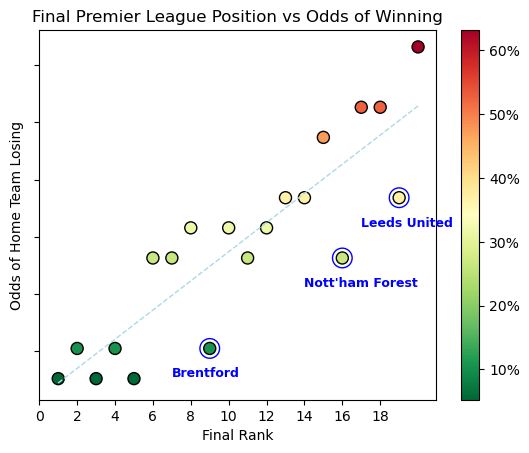

In [2088]:
##create a chart that will show the odds of winning
def scatter(df, x, y, title):
    return None

#variables to add to the function
df = stadium_year
x = df['rank']
y = df['Odds of Winning']
color = df['Odds of Winning']

title = 'Final Premier League Position vs Odds of Winning'
xlab = 'Final Rank'
ylab = 'Odds of Home Team Losing'
cmap = 'RdYlGn_r'


#ORIGINAL SCATTER PLOT
#create the original scatter plot
scatter = plt.scatter(
    x, #x variable
    y, #y variable
    c=color, #add in the column that is going to be used for the different points
    cmap = 'RdYlGn_r', #cmap colors
    s=75, #size of the scatter plot points
    edgecolor='black'
)

#ADD IN THE LINEAR LINE
#find the distances from the line and then locate
y_pred = m * x + b
farthest_indicies = abs(y - y_pred).nlargest(3).index
farthest_points = df.loc[farthest_indicies]

#create the trend line using polyfit which finds the line that minimizes sum of square error
m, b = np.polyfit(x, y, 1)
#create the linear line of where the average should be 
x_line = np.linspace(min(x), max(x))
y_line = m * x_line + b
plt.plot(x_line, y_line, color='lightblue', linestyle='--', linewidth=1, label='Trend Line')


#create a second scatter plot that is going to highlight the values that are farthest from the average line
plt.scatter(
    farthest_points['rank'],
    farthest_points['Odds of Winning'],
    facecolors='none',
    edgecolors='blue',
    s=200,
    marker = 'o',
    label = 'Outliers'
)

#LABEL THE POINTS THAT ARE OUTLIERS
# Label the farthest points from the line meaning they performed best or worst compared to the average league at home
for _, row in farthest_points.iterrows():
    plt.text(
        row['rank'] - 2, #x-axis
        row['Odds of Winning'] - 0.05, #y-axis
        row['Team'], #label
        fontsize=9, 
        fontweight='bold',
        color='blue'
    )


#add in titles / axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)


#add in the colorbar for easier reference
cbar = plt.colorbar(scatter)

#set the y-axis to be a percentage based on the color bar
plt.gca().set_yticklabels([])
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(range(0,20,2))